In [23]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

from pneumonia.ml_logic.preprocessor import train_generator, val_generator, test_generator
from pneumonia.ml_logic.baseline import compile, fitting
from tensorflow.keras.layers import Rescaling
from tensorflow.keras import Input

from tensorflow.keras.applications.inception_v3 import InceptionV3

# InceptionV3 model

In [2]:
def inceptionv3():
    incep = InceptionV3(input_shape = (256, 256, 3), include_top = False, weights = 'imagenet')
    incep.trainable = False
    
    input_dim = (256,256,3)
    scale = (1./255.)
    model = Sequential([
        incep,
        Input(shape=input_dim),
        Rescaling(scale),
        Flatten(),
        Dense(32, activation="relu"),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    
    return model

In [3]:
#Instatiate model
inception_model = inceptionv3()

2023-03-27 10:03:47.589174: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-27 10:03:47.589425: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M2 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



In [4]:
compile(inception_model)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 input_2 (InputLayer)        multiple                  0         
                                                                 
 rescaling (Rescaling)       (None, 6, 6, 2048)        0         
                                                                 
 flatten (Flatten)           (None, 73728)             0         
                                                                 
 dense (Dense)               (None, 32)                2359328   
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 3

In [5]:
# Fit the model
history_inceptionv3 = fitting(inception_model, use_multiprocessing=False)

Found 4716 files belonging to 2 classes.
Found 604 files belonging to 2 classes.
Epoch 1/20


2023-03-27 10:03:52.294232: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-27 10:03:54.296576: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


148/148 [==============================] - ETA: 0s - loss: 0.0904 - accuracy: 0.9086 - recall: 0.9017

2023-03-27 10:04:14.673816: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


148/148 [==============================] - 26s 155ms/step - loss: 0.0904 - accuracy: 0.9086 - recall: 0.9017 - val_loss: 0.2332 - val_accuracy: 0.9073 - val_recall: 0.8899
Epoch 2/20
148/148 [==============================] - 21s 142ms/step - loss: 0.0516 - accuracy: 0.9480 - recall: 0.9421 - val_loss: 0.2035 - val_accuracy: 0.9272 - val_recall: 0.9483
Epoch 3/20
148/148 [==============================] - 21s 141ms/step - loss: 0.0480 - accuracy: 0.9519 - recall: 0.9479 - val_loss: 0.1913 - val_accuracy: 0.9272 - val_recall: 0.9393
Epoch 4/20
148/148 [==============================] - 21s 141ms/step - loss: 0.0430 - accuracy: 0.9574 - recall: 0.9529 - val_loss: 0.2012 - val_accuracy: 0.9222 - val_recall: 0.9573
Epoch 5/20
148/148 [==============================] - 21s 141ms/step - loss: 0.0402 - accuracy: 0.9587 - recall: 0.9540 - val_loss: 0.1989 - val_accuracy: 0.9272 - val_recall: 0.9326
Epoch 6/20
148/148 [==============================] - 21s 141ms/step - loss: 0.0376 - accuracy: 

In [19]:
model, history = history_inceptionv3

Text(0.5, 1.0, 'Accuracy Evolution')

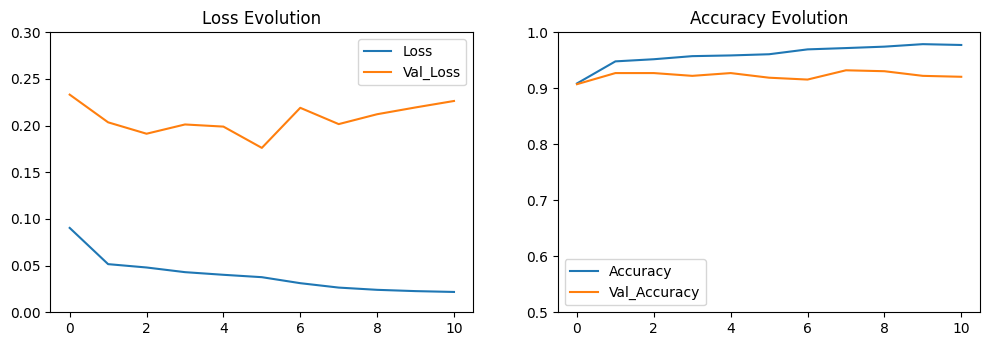

In [20]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val_Loss')
plt.ylim(0, 0.3)
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val_Accuracy')
plt.ylim(0.5,1)
plt.legend()
plt.title('Accuracy Evolution')

In [34]:
evaluation = model.evaluate(test_generator())
print(f"Test Loss: {evaluation[0] * 100:.2f}%")
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")
print(f"Test Recall: {evaluation[2] * 100:.2f}%")


Found 548 files belonging to 2 classes.
18/18 [==============================] - 3s 122ms/step - loss: 0.7281 - accuracy: 0.8394 - recall: 0.9846
Test Loss: 72.81%
Test Accuracy: 83.94%
Test Recall: 98.46%


In [29]:
test_generator().class_names

Found 548 files belonging to 2 classes.


['NORMAL', 'PNEUMONIA']

In [35]:
pred = model.predict(test_generator())
print(pred)

Found 548 files belonging to 2 classes.
18/18 [==============================] - 2s 124ms/step
[[9.99942183e-01]
 [9.95157599e-01]
 [9.99293745e-01]
 [9.99547482e-01]
 [8.29717636e-01]
 [9.99998927e-01]
 [9.99995232e-01]
 [6.13424003e-01]
 [9.99999285e-01]
 [9.91375268e-01]
 [6.98113561e-01]
 [4.83506219e-03]
 [9.99992013e-01]
 [9.99986410e-01]
 [7.30070531e-01]
 [1.00000000e+00]
 [6.13424003e-01]
 [9.99996305e-01]
 [9.99999881e-01]
 [1.69717848e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.99977469e-01]
 [1.48253434e-03]
 [9.99999881e-01]
 [9.99998808e-01]
 [9.99782026e-01]
 [3.62916142e-01]
 [9.94784176e-01]
 [2.31732774e-04]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.95541275e-01]
 [6.94661885e-02]
 [7.72371859e-05]
 [1.96094401e-02]
 [6.57004058e-01]
 [8.57712608e-03]
 [9.97068226e-01]
 [9.99970436e-01]
 [9.99253869e-01]
 [9.87207234e-01]
 [9.99900818e-01]
 [9.99968171e-01]
 [9.99985218e-01]
 [9.99554455e-01]
 [9.99682903e-01]
 [9.99999881e-01]
 [9.99996662e-01]
 [9.9